# 4, Adaptando los datos

### David Morais

In [2]:
!pip install ucimlrepo pandas numpy scikit-learn matplotlib seaborn --quiet

In [3]:
import pandas as pd
import numpy as np
from  ucimlrepo import fetch_ucirepo
import sklearn

import matplotlib.pyplot as plt
import seaborn as sns


 Los datos se pueden cargar usando la librería ucimlrepo mediante el método fetch_ucirepo
 usando 529 como valor del parámetro id. Esto retorna una estructura desde la que se puede
 acceder a los datos y sus características.

In [4]:
data  = fetch_ucirepo(id=529)
print(data.metadata.num_instances)
# Lo pasamos a un dataframe de pandas
features = data.data.features
targets = data.data.targets

df = features.copy()
df['class'] = targets
df

520


,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


a) Divide los datos en entrenamiento y test (70%/30%), la partición debe estratificarse (fija 
también el estado del generador de números aleatorios para la reproducibilidad). Haz
una visualización mínima de las variables para hacerte una idea de los datos y calcu
la sus correlaciones. Transformaremos el atributo edad a discreto utilizando el método
KBinsDiscretizer. Obtendremos una matriz de datos binaria usando como parametro 
encoder-onehot-dense aplicando dos formas alternativas de obtener los intervalos
uniform y quantile. Generaremos conjuntos de datos con 2, 3 y 5 particiones. Aplica
correctamente estos preprocesos a los datos.

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.3, random_state=42, stratify=targets)
X_train

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity
497,47,Male,No,No,No,No,No,No,No,No,Yes,No,Yes,No,No,Yes
233,50,Male,No,No,No,Yes,No,No,No,Yes,No,Yes,Yes,Yes,Yes,No
116,30,Female,Yes,Yes,Yes,No,Yes,No,No,No,Yes,No,Yes,Yes,No,No
365,45,Female,No,No,No,No,Yes,No,Yes,Yes,No,No,Yes,No,No,No
276,30,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,40,Male,No,Yes,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No
227,30,Male,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No
303,58,Female,Yes,No,Yes,No,Yes,No,No,No,Yes,No,No,Yes,No,Yes


In [6]:
df.isna().sum()
df['class'][0]

'Positive'

Podemos ver que no hay ningún valor nulo en el dataset.  
Tenemos que transformar los strings Yes/No en 1/0 para tener valores numericos.

In [7]:
cols = X_train.columns[2:]
cols
df_bin = df.copy()
for col in cols:
    df_bin[col] = df[col].map({"Yes": True, "No":False})
    
df_bin['class'] = df['class'].map({'Positive': True, 'Negative': False})
#df_bin['gender'] = df['gender'].map({'Male': 1, 'Female': 0})
dummies = pd.get_dummies(df['gender'], drop_first=True, prefix='Is', prefix_sep='_')
df_bin = pd.concat([df_bin, dummies], axis=1)
df_bin.drop(columns=['gender'], inplace=True)
df_bin


,age,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class,Is_Male
0,40,False,True,False,True,False,False,False,True,False,True,False,True,True,True,True,True
1,58,False,False,False,True,False,False,True,False,False,False,True,False,True,False,True,True
2,41,True,False,False,True,True,False,False,True,False,True,False,True,True,False,True,True
3,45,False,False,True,True,True,True,False,True,False,True,False,False,False,False,True,True
4,60,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,True,True,True,False,True,False,False,True,False,True,True,False,False,False,True,False
516,48,True,True,True,True,True,False,False,True,True,True,True,False,False,False,True,False
517,58,True,True,True,True,True,False,True,False,False,False,True,True,False,True,True,False
518,32,False,False,False,True,False,False,True,True,False,True,False,False,True,False,False,False


In [8]:
def preprocessing(X, y):
    X = X.copy()
    y = y.copy()
    
    cols = [col for col in X.columns if col not in ['age', 'gender']]

    for col in cols:
        X[col] = X[col].map({"Yes": True, "No":False})
        
    # One-hot encoding para el genero
    dummies = pd.get_dummies(X['gender'], drop_first=True, prefix='Is', prefix_sep='_')
    X = pd.concat([X, dummies], axis=1)
    X.drop(columns=['gender'], inplace=True)
    
    # Pasar positivo negativo a True/False
    y['class'] = y['class'].map({'Positive': True, 'Negative': False})

    return X, y
    

NaN por columna:
 age                   0
polyuria              0
polydipsia            0
sudden_weight_loss    0
weakness              0
polyphagia            0
genital_thrush        0
visual_blurring       0
itching               0
irritability          0
delayed_healing       0
partial_paresis       0
muscle_stiffness      0
alopecia              0
obesity               0
class                 0
Is_Male               0
dtype: int64


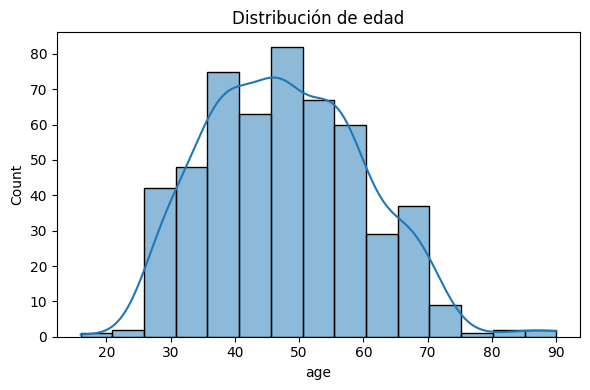

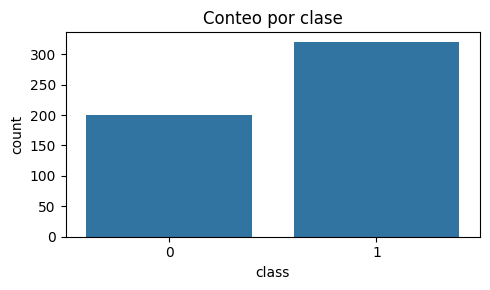

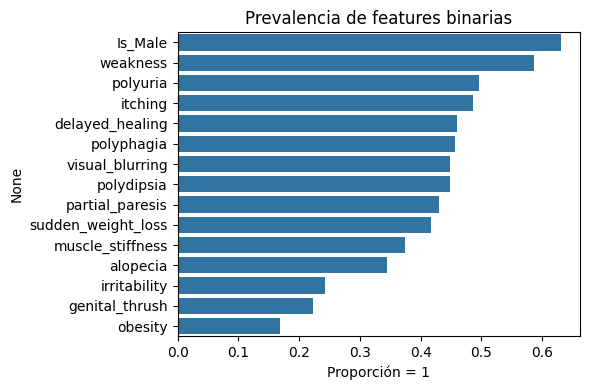

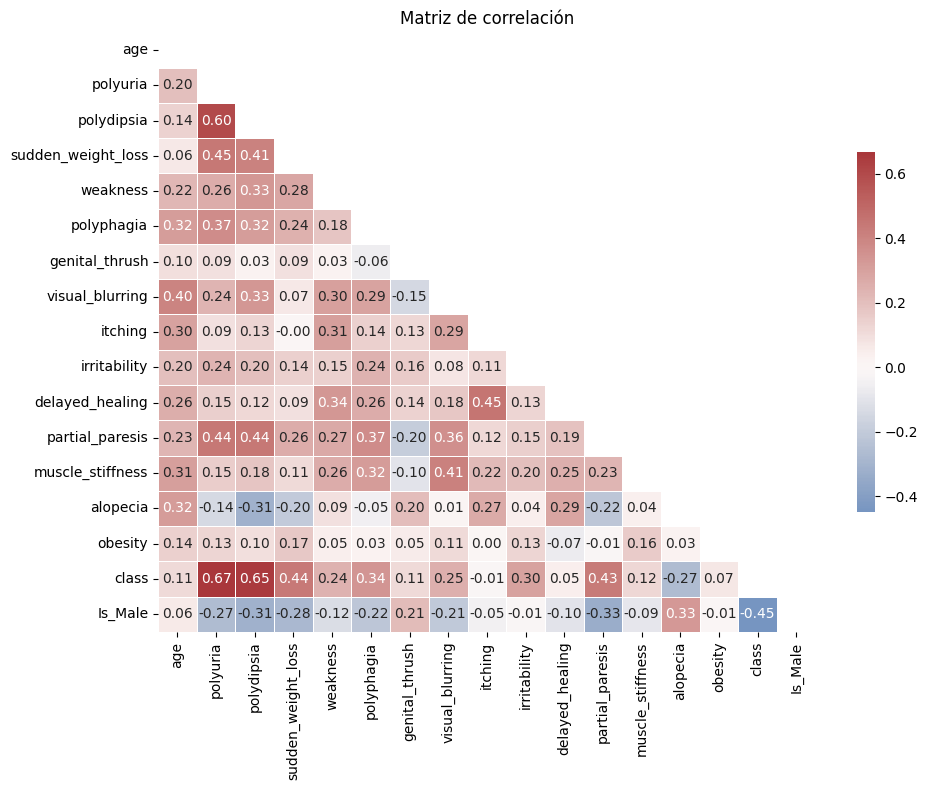

In [9]:
# usar df_bin generado antes; si no existe usa df.copy()
df_vis = df_bin.copy()

# resumir faltantes
print("NaN por columna:\n", df_vis.isna().sum())

# convertir booleanos a 0/1 para gráficos y correlación
bool_cols = df_vis.select_dtypes(include=['bool']).columns.tolist()
df_vis[bool_cols] = df_vis[bool_cols].astype(int)

# 1) Distribución de edad
plt.figure(figsize=(6,4))
sns.histplot(df_vis['age'], bins=15, kde=True)
plt.title("Distribución de edad")
plt.xlabel("age")
plt.tight_layout()
plt.show()

# 2) Conteo por clase
plt.figure(figsize=(5,3))
sns.countplot(x='class', data=df_vis)
plt.title("Conteo por clase")
plt.tight_layout()
plt.show()

# 3) Prevalencia de features binarias (proporción True/1)
bin_features = [c for c in df_vis.columns if c not in ['age','class']]
prev = df_vis[bin_features].mean().sort_values(ascending=False)
plt.figure(figsize=(6, max(4, 0.25*len(prev))))
sns.barplot(x=prev.values, y=prev.index)
plt.xlabel("Proporción = 1")
plt.title("Prevalencia de features binarias")
plt.tight_layout()
plt.show()

# 4) Matriz de correlación (incluye age y binarias convertidas)
corr = df_vis.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10,8))
sns.heatmap(corr, mask=mask, cmap='vlag', center=0, annot=True, fmt=".2f",
            linewidths=0.5, cbar_kws={"shrink": .6})
plt.title("Matriz de correlación")
plt.tight_layout()
plt.show()

TODO: Hablar de los gráficos y las correlaciones.

Ahora vamos a transformar la variable edad en discreta usando KBinsDiscretizer.

In [10]:
X_test

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity
336,42,Male,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No
378,47,Male,Yes,Yes,No,No,No,No,No,No,No,No,No,Yes,No,No
252,39,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No
273,45,Male,No,No,No,No,Yes,Yes,No,No,No,No,No,No,No,No
434,53,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,66,Male,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Yes,No
353,60,Male,No,No,No,Yes,No,No,No,No,No,No,Yes,Yes,No,No
125,55,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,No,No,No
280,40,Male,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Yes


In [11]:
from sklearn.preprocessing import KBinsDiscretizer

strategies = ['uniform', 'quantile']
n_bins_list = [2,3,5]
X_train, y_train = preprocessing(X_train, y_train)
X_test, y_test = preprocessing(X_test, y_test)
Xtr = X_train.copy().reset_index(drop=True)
Xte = X_test.copy().reset_index(drop=True)
results = {}

for strat in strategies:
    for n in n_bins_list:
        kb = KBinsDiscretizer(n_bins=n, encode='onehot-dense', strategy=strat, quantile_method="averaged_inverted_cdf")
        
        kb.fit(Xtr[['age']])
        Xtr_age = kb.transform(Xtr[['age']])
        Xte_age = kb.transform(Xte[['age']])
        age_cols = [f'age_bin_{i}' for i in range(Xtr_age.shape[1])]
        
        # construir nuevos DataFrames sin 'age' y con las columnas binned
        Xtr_other = Xtr.drop(columns=['age']).reset_index(drop=True)
        Xte_other = Xte.drop(columns=['age']).reset_index(drop=True)

        Xtr_new = pd.concat([Xtr_other, pd.DataFrame(Xtr_age, columns=age_cols)], axis=1)
        Xte_new = pd.concat([Xte_other, pd.DataFrame(Xte_age, columns=age_cols)], axis=1)

        results[(strat, n)] = (Xtr_new, Xte_new)

TODO: Comentar los resultados obtenidos con uniform y quantile.

In [12]:
Xtr_u2, Xte_u2 = results[('uniform', 2)]
Xtr_u3, Xte_u3 = results[('uniform', 3)]
Xtr_u5, Xte_u5 = results[('uniform', 5)]

Xtr_q2, Xte_q2 = results[('quantile', 2)]
Xtr_q3, Xte_q3 = results[('quantile', 3)]
Xtr_q5, Xte_q5 = results[('quantile', 5)]

# Verificar
print("Uniform 2 bins:", Xtr_u2.shape)
print("Quantile 5 bins:", Xtr_q5.shape)
display(Xtr_q3.head())

Uniform 2 bins: (364, 17)
Quantile 5 bins: (364, 20)


,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,Is_Male,age_bin_0,age_bin_1,age_bin_2
0,False,False,False,False,False,False,False,False,True,False,True,False,False,True,True,0.0,1.0,0.0
1,False,False,False,True,False,False,False,True,False,True,True,True,True,False,True,0.0,1.0,0.0
2,True,True,True,False,True,False,False,False,True,False,True,True,False,False,False,1.0,0.0,0.0
3,False,False,False,False,True,False,True,True,False,False,True,False,False,False,False,0.0,1.0,0.0
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,1.0,0.0,0.0


 b) Empezaremos por Naïve Bayes y regresión logística. Ajusta un modelo para los conjuntos
 de datos que has generado y evalúa adecuadamente la calidad de los modelos. Determina
 cuál es el mejor preproceso para la variable edad.

In [13]:
Xtr

,age,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,Is_Male
0,47,False,False,False,False,False,False,False,False,True,False,True,False,False,True,True
1,50,False,False,False,True,False,False,False,True,False,True,True,True,True,False,True
2,30,True,True,True,False,True,False,False,False,True,False,True,True,False,False,False
3,45,False,False,False,False,True,False,True,True,False,False,True,False,False,False,False
4,30,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,40,False,True,True,True,False,False,True,True,False,False,True,True,False,False,True
360,30,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True
361,41,True,False,False,True,True,False,False,True,False,True,False,True,True,False,True
362,58,True,False,True,False,True,False,False,False,True,False,False,True,False,True,False


uniform  | 2 bins | NB: acc=0.885 auc=0.953 | LR: acc=0.917 auc=0.968
uniform  | 3 bins | NB: acc=0.885 auc=0.953 | LR: acc=0.910 auc=0.969
uniform  | 5 bins | NB: acc=0.891 auc=0.954 | LR: acc=0.917 auc=0.970
quantile | 2 bins | NB: acc=0.878 auc=0.950 | LR: acc=0.910 auc=0.968
quantile | 3 bins | NB: acc=0.885 auc=0.952 | LR: acc=0.910 auc=0.968
quantile | 5 bins | NB: acc=0.865 auc=0.954 | LR: acc=0.917 auc=0.970


,Strategy,N_bins,NB_Accuracy,NB_AUC,LR_Accuracy,LR_AUC
5,quantile,5,0.865385,0.954253,0.916667,0.970052
2,uniform,5,0.891026,0.954427,0.916667,0.969705
1,uniform,3,0.884615,0.952865,0.910256,0.969358
4,quantile,3,0.884615,0.952344,0.910256,0.968142
0,uniform,2,0.884615,0.952865,0.916667,0.967795
3,quantile,2,0.878205,0.949913,0.910256,0.967622


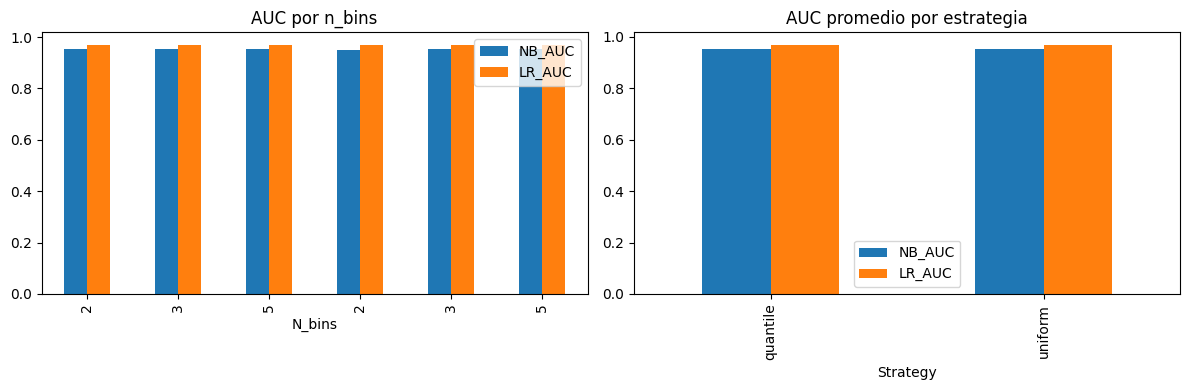

In [14]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

eval_results = []

ytr = y_train['class'].values
yte = y_test['class'].values

for (strat, n), (Xtr, Xte) in results.items():
    
    # 1) Naive Bayes (Bernoulli para datos binarios)
    nb = BernoulliNB()
    nb.fit(Xtr, ytr)
    y_pred_nb = nb.predict(Xte)
    y_proba_nb = nb.predict_proba(Xte)[:,1]
    
    acc_nb = accuracy_score(yte, y_pred_nb)
    auc_nb = roc_auc_score(yte, y_proba_nb)

    # 2) Regresion Logistica
    lr = LogisticRegression(max_iter=1000, random_state=1130)
    lr.fit(Xtr, ytr)
    y_pred_lr = lr.predict(Xte)
    y_proba_lr = lr.predict_proba(Xte)[:,1]
    
    acc_lr = accuracy_score(yte, y_pred_lr)
    auc_lr = roc_auc_score(yte, y_proba_lr)
    
    eval_results.append({
        'Strategy': strat,
        'N_bins': n,
        'NB_Accuracy': acc_nb,
        'NB_AUC': auc_nb,
        'LR_Accuracy': acc_lr,
        'LR_AUC': auc_lr
    }) 
    
    print(f"{strat:8s} | {n} bins | NB: acc={acc_nb:.3f} auc={auc_nb:.3f} | LR: acc={acc_lr:.3f} auc={auc_lr:.3f}")

results_df = pd.DataFrame(eval_results)
display(results_df.sort_values('LR_AUC', ascending=False))

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
results_df.plot(x='N_bins', y=['NB_AUC', 'LR_AUC'], kind='bar', ax=axes[0], title='AUC por n_bins')
results_df.groupby('Strategy')[['NB_AUC', 'LR_AUC']].mean().plot(kind='bar', ax=axes[1], title='AUC promedio por estrategia')
plt.tight_layout()
plt.show()
    

c) Una ventaja que tiene el usar un modelo interpretable como la regresión logística es que podemos saber la importancia de los atributos. Mira los pesos del mejor modelo y determina qué es lo más importante para el diagnóstico. ¿Es la edad importante?

Mejor configuración: quantile con 5 bins
AUC: 0.970

Importancia de los atributos (ordenados por valor absoluto):


,Feature,Coefficient,Abs_Coefficient
1,polydipsia,2.941921,2.941921
14,Is_Male,-2.785753,2.785753
0,polyuria,2.401492,2.401492
8,irritability,1.184799,1.184799
5,genital_thrush,1.096003,1.096003
7,itching,-1.033965,1.033965
10,partial_paresis,0.879986,0.879986
4,polyphagia,0.798215,0.798215
2,sudden_weight_loss,0.597021,0.597021
9,delayed_healing,-0.464890,0.464890


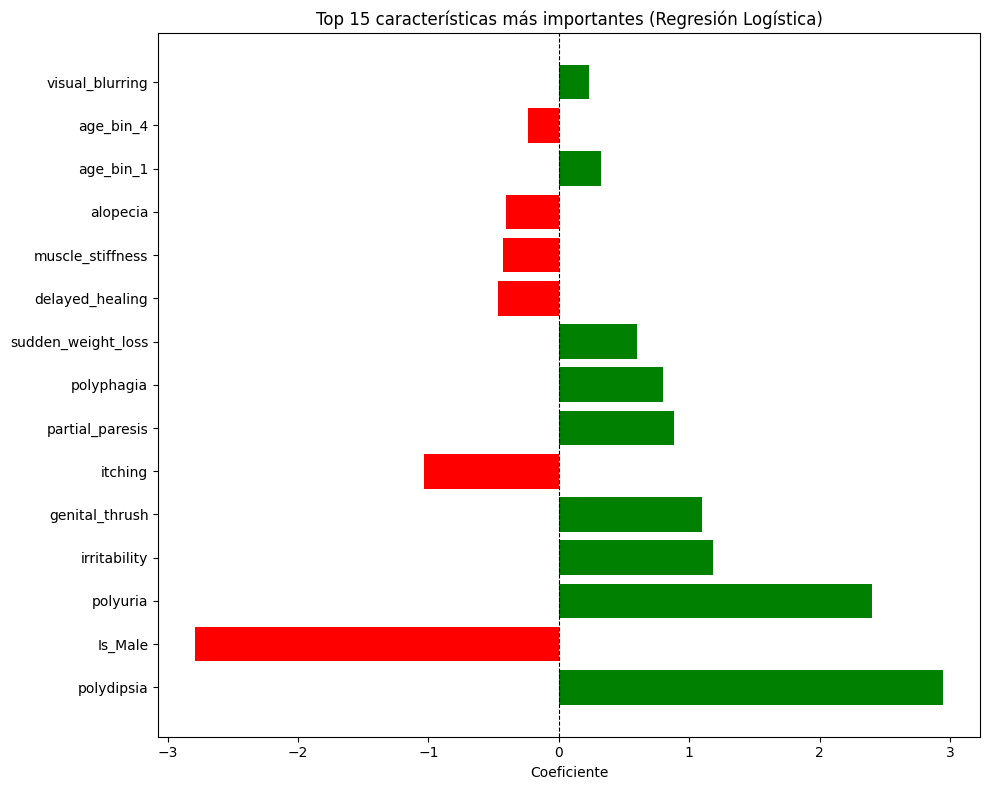


Importancia de las variables de edad:


,Feature,Coefficient,Abs_Coefficient
16,age_bin_1,0.320362,0.320362
19,age_bin_4,-0.236105,0.236105
15,age_bin_0,-0.127610,0.127610
17,age_bin_2,0.090281,0.090281
18,age_bin_3,-0.028364,0.028364



Importancia total (suma abs) de edad: 0.803
Importancia promedio de edad: 0.161
Ranking promedio de edad: 17.0 de 20


In [17]:
# Identificar el mejor modelo de regresión logística
best_config = results_df.loc[results_df['LR_AUC'].idxmax()]
best_strat = best_config['Strategy']
best_n = best_config['N_bins']

print(f"Mejor configuración: {best_strat} con {best_n} bins")
print(f"AUC: {best_config['LR_AUC']:.3f}")

# Entrenar de nuevo el mejor modelo para obtener los coeficientes
Xtr_best, Xte_best = results[(best_strat, best_n)]
lr_best = LogisticRegression(max_iter=1000, random_state=1130)
lr_best.fit(Xtr_best, ytr)

# Obtener coeficientes y nombres de features
coefficients = lr_best.coef_[0]
feature_names = Xtr_best.columns.tolist()

# Crear DataFrame con features y sus coeficientes
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
}).sort_values('Abs_Coefficient', ascending=False)

print("\nImportancia de los atributos (ordenados por valor absoluto):")
display(importance_df)

# Visualizar los coeficientes más importantes
plt.figure(figsize=(10, 8))
top_n = 15  # Mostrar las 15 características más importantes
top_features = importance_df.head(top_n)
colors = ['red' if c < 0 else 'green' for c in top_features['Coefficient']]
plt.barh(range(len(top_features)), top_features['Coefficient'], color=colors)
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Coeficiente')
plt.title(f'Top {top_n} características más importantes (Regresión Logística)')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()

# Analizar específicamente la edad
age_features = importance_df[importance_df['Feature'].str.contains('age_bin')]
print("\nImportancia de las variables de edad:")
display(age_features)

if len(age_features) > 0:
    total_age_importance = age_features['Abs_Coefficient'].sum()
    avg_age_importance = age_features['Abs_Coefficient'].mean()
    print(f"\nImportancia total (suma abs) de edad: {total_age_importance:.3f}")
    print(f"Importancia promedio de edad: {avg_age_importance:.3f}")
    avg_rank = np.mean(importance_df[importance_df['Feature'].str.contains('age_bin')].index.to_numpy())
    print(f"Ranking promedio de edad: {avg_rank:.1f} de {len(importance_df)}")
else:
    print("\nNo se encontraron variables de edad en el modelo.")

Mejores parámetros KNN: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
Mejor AUC en validación cruzada: 0.992

Resultados en test:
KNN: acc=0.962 auc=0.994
LR (mejor anterior): acc=0.917 auc=0.970
NB (mejor anterior): acc=0.865 auc=0.954


,Modelo,Accuracy,AUC
2,KNN,0.961538,0.993837
1,Regresión Logística,0.916667,0.970052
0,Naive Bayes,0.865385,0.954253


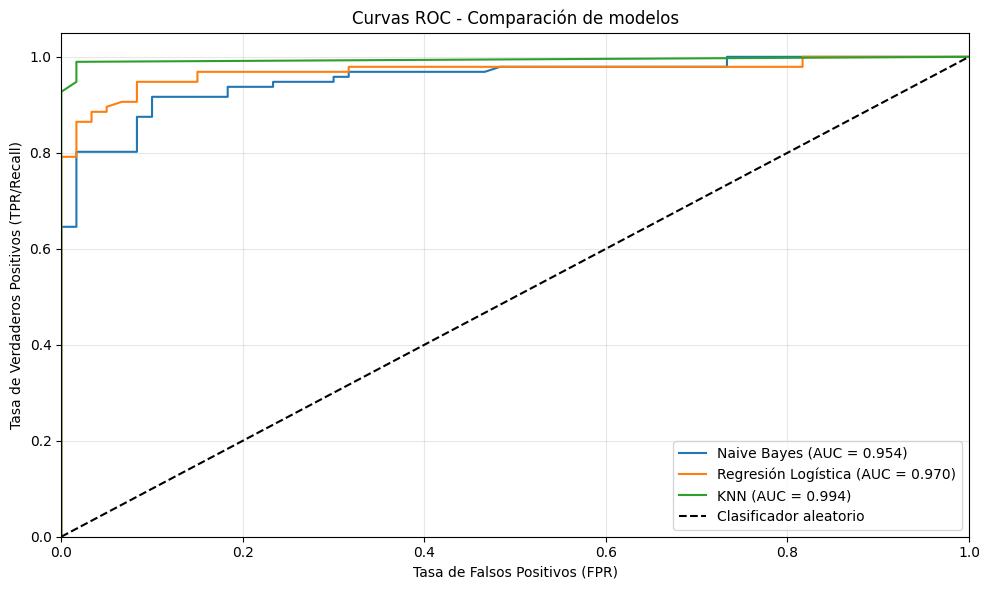

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, precision_score, f1_score, roc_curve, auc

# Usar el mejor conjunto de datos (quantile con 5 bins)
Xtr_best, Xte_best = results[(best_strat, best_n)]

# 1) Búsqueda de hiperparámetros para KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15, 20],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(Xtr_best, ytr)

print("Mejores parámetros KNN:", grid_search.best_params_)
print(f"Mejor AUC en validación cruzada: {grid_search.best_score_:.3f}")

# 2) Entrenar el mejor KNN
best_knn = grid_search.best_estimator_
y_pred_knn = best_knn.predict(Xte_best)
y_proba_knn = best_knn.predict_proba(Xte_best)[:,1]

acc_knn = accuracy_score(yte, y_pred_knn)
auc_knn = roc_auc_score(yte, y_proba_knn)

print(f"\nResultados en test:")
print(f"KNN: acc={acc_knn:.3f} auc={auc_knn:.3f}")
print(f"LR (mejor anterior): acc={best_config['LR_Accuracy']:.3f} auc={best_config['LR_AUC']:.3f}")
print(f"NB (mejor anterior): acc={results_df.loc[5, 'NB_Accuracy']:.3f} auc={results_df.loc[5, 'NB_AUC']:.3f}")

# 3) Comparación completa de modelos
models_comparison = pd.DataFrame({
    'Modelo': ['Naive Bayes', 'Regresión Logística', 'KNN'],
    'Accuracy': [results_df.loc[5, 'NB_Accuracy'], best_config['LR_Accuracy'], acc_knn],
    'AUC': [results_df.loc[5, 'NB_AUC'], best_config['LR_AUC'], auc_knn]
})
display(models_comparison.sort_values('AUC', ascending=False))

# 4) Curvas ROC para todos los modelos
plt.figure(figsize=(10, 6))

# Naive Bayes
nb = BernoulliNB()
nb.fit(Xtr_best, ytr)
y_proba_nb = nb.predict_proba(Xte_best)[:,1]
fpr_nb, tpr_nb, _ = roc_curve(yte, y_proba_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {roc_auc_nb:.3f})')

# Regresión Logística
y_proba_lr = lr_best.predict_proba(Xte_best)[:,1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(yte, y_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, label=f'Regresión Logística (AUC = {roc_auc_lr:.3f})')

# KNN
fpr_knn, tpr_knn, thresholds_knn = roc_curve(yte, y_proba_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Clasificador aleatorio')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR/Recall)')
plt.title('Curvas ROC - Comparación de modelos')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


A veces es mejor tener una mayor precisión en el diagnóstico que el poder interpretar los
 resultados. Ajusta un modelo k-vecinos cercanos al conjunto de datos que obtiene el mejor
 resultado en los modelos anteriores explorando adecuadamente sus parámetros. Compa
ra los resultados con los otros modelos. Todos los modelos que has usado permiten una
 predicción probabilística y, por lo tanto, podemos decidir en que punto podemos poner el
 límite para asegurar que todos los casos positivos se acierten a pesar de introducir falsos
 positivos. ¿Qué modelo sería mejor para hacer eso?